In [1]:
import random 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

## reading mandi data

In [2]:
data1=pd.read_csv('./CMO_MSP_Mandi.csv')
data1.head()

,commodity,year,Type,msprice,msp_filter
0,PADDY-UNHUSKED,2012,Kharif Crops,1250.0,1
1,RICE(PADDY-HUS),2012,Kharif Crops,1280.0,1
2,Jowar_Hybrid,2012,Kharif Crops,1500.0,1
3,SORGUM(JAWAR),2012,Kharif Crops,1520.0,1
4,BAJRI,2012,Kharif Crops,1175.0,1


## reading cmo data

In [3]:
data2=pd.read_csv('./Monthly_data_cmo.csv',parse_dates=['date'])
data2.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04-01,Ahmadnagar,Maharashtra
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04-01,Ahmadnagar,Maharashtra
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04-01,Ahmadnagar,Maharashtra
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04-01,Ahmadnagar,Maharashtra
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04-01,Ahmadnagar,Maharashtra


In [8]:
data_group=data1.groupby('commodity').mean()
data_group=data_group.reset_index()[['commodity','msprice']]
data_group.head()

,commodity,msprice
0,BAJRI,1268.00
1,BARLI,1113.75
2,COCONUT,1470.00
3,COTTON,3742.00
4,Copra (Ball)_Yellow,5684.00


## creating a dictionary with commodity as keys and msprice as values

In [9]:
dicto = dict(zip(data_group['commodity'],data_group['msprice']))
dicto
        

{'BAJRI': 1268.0,
 'BARLI': 1113.75,
 'COCONUT': 1470.0,
 'COTTON': 3742.0,
 'Copra (Ball)_Yellow': 5684.0,
 'Copra (Milling)_Yellow': 5420.0,
 'Cotton_Long Staple': 4042.0,
 'GR.NUT KERNELS': 3970.0,
 'Gram_Yellow': 3175.0,
 'Jowar_Hybrid': 1545.0,
 'Jute_Yellow': 2560.0,
 'MAIZE': 1297.0,
 'MUSTARD': 3125.0,
 'Masur_Yellow': 3062.5,
 'NIGER-SEED': 3595.0,
 'PADDY-UNHUSKED': 1360.0,
 'PIGEON PEA (TUR)': 4310.0,
 'RICE(PADDY-HUS)': 1397.0,
 'Ragi_Maldandi': 1585.0,
 'SAFFLOWER': 3037.5,
 'SESAMUM': 4560.0,
 'SORGUM(JAWAR)': 1566.0,
 'SOYABEAN': 2527.0,
 'SPILT GERRN GRAM': 4590.0,
 'SPLIT BLACK GRAM': 4390.0,
 'SUGAR-CANE': 207.5,
 'SUGARCANE': 230.0,
 'SUNFLOWER': 3760.0,
 'Soyabean_Black': 2400.0,
 'Toria_Yellow': 3075.0,
 'WHEAT(HUSKED)': 1431.25,
 'WHEAT(UNHUSKED)': 1431.25}

## filling null values with space

In [12]:
data1.msprice.fillna(value=' ',inplace=True)

## now filling nul space with other crops data with the hepl of dictionary 'dicto' which we created above

In [13]:
for i in range(len(data1['msprice'])):
    if data1['msprice'][i]==' ':
        data1['msprice'][i]=dicto[data1['commodity'][i]]
        #print(data1['msprice'][i])
data1

/home/praveen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,commodity,year,Type,msprice,msp_filter
0,PADDY-UNHUSKED,2012,Kharif Crops,1250,1
1,RICE(PADDY-HUS),2012,Kharif Crops,1280,1
2,Jowar_Hybrid,2012,Kharif Crops,1500,1
3,SORGUM(JAWAR),2012,Kharif Crops,1520,1
4,BAJRI,2012,Kharif Crops,1175,1
5,MAIZE,2012,Kharif Crops,1175,1
6,Ragi_Maldandi,2012,Kharif Crops,1500,1
7,PIGEON PEA (TUR),2012,Kharif Crops,3850,1
8,SPILT GERRN GRAM,2012,Kharif Crops,4400,1
9,SPLIT BLACK GRAM,2012,Kharif Crops,4300,1


###  finding outliers in the data mandi

In [14]:
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

year          2.0
msp_filter    0.0
dtype: float64


In [15]:
new_df = (data1[['year','msp_filter']] < (Q1 - 1.5 * IQR)) |(data1[['year','msp_filter']] > (Q3 + 1.5 * IQR))
new_df.head()

,year,msp_filter
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


## theree are no out layers in above data mandi

## finding out layers in  data2 cmo


In [17]:
data2.head(2)

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04-01,Ahmadnagar,Maharashtra
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04-01,Ahmadnagar,Maharashtra


In [18]:
Q1 = data2.quantile(0.25)
Q3 = data2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
    

Year                  1.0
arrivals_in_qtl    1326.0
min_price          2650.0
max_price          3047.0
modal_price        2807.0
dtype: float64


## now we got the IRQ values of the above dataset cmo
- lets find the out layers

In [19]:
new_df = (data2[['Year','arrivals_in_qtl','min_price','max_price','modal_price']] < (Q1 - 1.5 * IQR)) |(data2[['Year','arrivals_in_qtl','min_price','max_price','modal_price']] > (Q3 + 1.5 * IQR))
new_df.head()

,Year,arrivals_in_qtl,min_price,max_price,modal_price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,True,False,False,False


## if any row is containing True value then that row is consered as outlayer and we have to remove that entire row

In [20]:
cond = (data2[['Year','arrivals_in_qtl','min_price','max_price','modal_price']] < (Q1 - 1.5 * IQR)) | (data2[['Year','arrivals_in_qtl','min_price','max_price','modal_price']] >(Q3 + 1.5 * IQR))
cond.keys()

Index(['Year', 'arrivals_in_qtl', 'min_price', 'max_price', 'modal_price'], dtype='object')

In [21]:
data3 = data2.copy()
for key in cond.keys():
    data3 = data3[cond[key]]

/home/praveen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
list(cond.loc[4]).count(True) > 1

False

In [23]:
outlier = []
for i in range(len(cond)):
    outlier.append(list(cond.loc[i]).count(True) < 1)

In [24]:
data3 = data2[pd.Series(outlier)]

In [25]:
data3.shape

(49524, 11)

## after removing outlayers the data size of our data set is (49524,11)

In [29]:
#cond1 = (data3[['Year','arrivals_in_qtl','min_price','max_price','modal_price']] > (Q1 - 1.5 * IQR)) | (data3[['Year','arrivals_in_qtl','min_price','max_price','modal_price']] < (Q3 + 1.5 * IQR))

In [30]:
#cond1.keys()

In [31]:
#new_df['min_price'].value_counts()

In [32]:
#data3.shape

In [34]:
data2.Month.value_counts()

November     7183
October      6887
September    6518
June         4906
January      4858
December     4816
February     4625
May          4611
August       4554
March        4528
July         4498
April        4445
Name: Month, dtype: int64

In [35]:
import datetime
date_before = datetime.date(2016, 4, 1)
data2[(data2.Month=='April') & (data2.date == date_before)]

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name


In [36]:
data2.Commodity[(data2.Month=='April') & (data2.Year == 2015)]


0                        Bajri
2                Wheat(Husked)
4                Sorgum(Jawar)
6                        Maize
8                         Gram
10                  Horse Gram
11                       Matki
12            Pigeon Pea (Tur)
14                  Black Gram
16                 Castor Seed
17                     Soybean
31                       Onion
40                    Tamarind
42               Tamarind Seed
44             Coriander (Dry)
47               Chillies(Red)
49                     Mustard
51                       Bajri
53              Paddy-Unhusked
55               Wheat(Husked)
57                        Gram
59                     Soybean
61                       Onion
64                       Bajri
66               Wheat(Husked)
68               Sorgum(Jawar)
70                        Gram
74                       Onion
76                       Bajri
78               Wheat(Husked)
                 ...          
58374         Pigeon Pea (Tur)
58376   

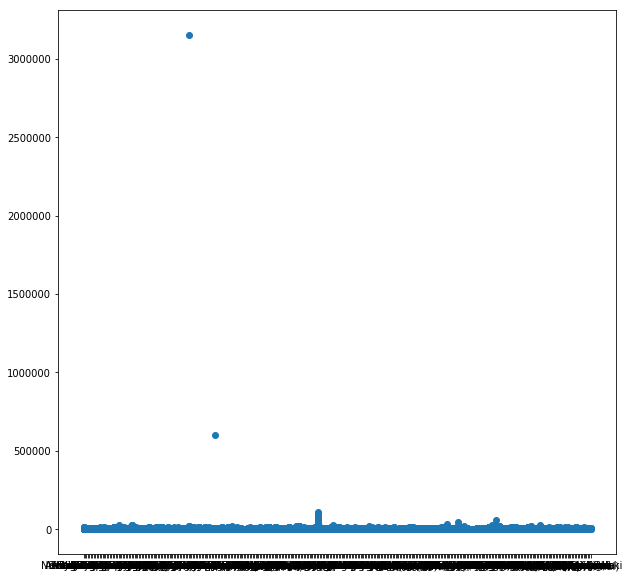

In [37]:
data2[data2.Commodity=='Bajri']

plt.figure(figsize=(10,10))
plt.scatter(data2.APMC,data2.min_price,)

In [ ]:
## in abou

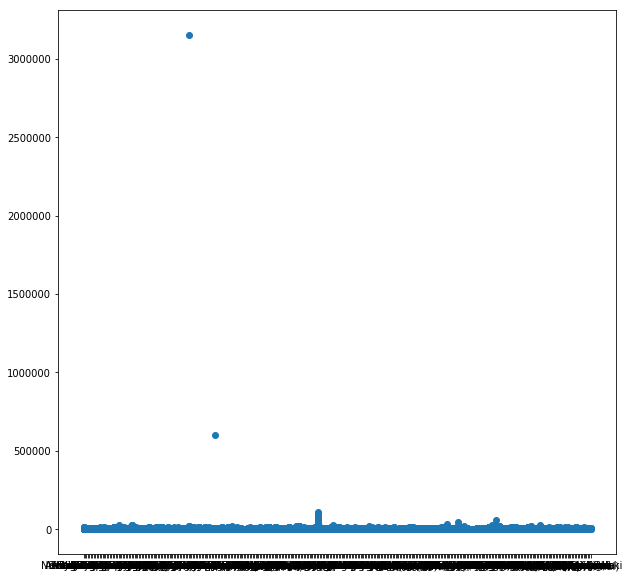

In [38]:
plt.figure(figsize=(10,10))
plt.scatter(data2.APMC,data2.min_price,)

In [49]:
data1.Type.value_counts()

Kharif Crops    90
Rabi Crops      40
Other Crops     25
Name: Type, dtype: int64

In [50]:
data2.Month.value_counts()

November     7183
October      6887
September    6518
June         4906
January      4858
December     4816
February     4625
May          4611
August       4554
March        4528
July         4498
April        4445
Name: Month, dtype: int64

## June to October:-Karef
## October or November:-Rabi
KHARIF CROPS
Kharif crops are usually sown with the beginning of the first rains towards the end of May in the southern state of Kerala during the advent of south-west monsoon season. As the monsoon rains advance towards the north India, the sowing dates vary accordingly and reach July in north Indian states.

These crops are dependent on the quantity of rainwater as well its timing. Too much, too little or at wrong time may lay waste the whole year’s efforts. Common kharif crops-  Rice (paddy and deepwater) Millet Maize (corn).

 

Common kharif cropsRice (paddy and deepwater)MilletMaize (corn)Moongturmericgroundnutcotton
 

2. RABI CROPS
 

Rabi crops or Rabi harvest are agricultural crops sown in winter and harvested in the spring in the South Asia. The term is derived from the Arabic word for “spring”, which is used in the Indian subcontinent, where it is the spring harvest (also known as the “winter crop”).

The rabi crops are sown around mid-November, after the monsoon rains are over, and harvesting begins in April/May. The crops are grown either with rainwater that has percolated into the ground, or with irrigation. A good rain in winter spoils the rabi crops but is good for kharif crops.

The major rabi crop in India is wheat, followed by barley, mustard, sesame and peas. Peas are harvested early, as they are ready early: Indian markets are flooded with green peas from January to March, peaking in February.

Many crops are cultivated in both kharif and rabi seasons. The agriculture crops produced in India are seasonal in nature and highly dependent on these two monsoons.

Cerealswheat (Triticum aestvium)oat (Avena sativa)barleySeed plantsalfalfa (Lucerne, Medicago sativa)linseedsesamecumin (Cuminum cyminum, L)coriander (Coriandrum sativum, L)mustard (Brassica juncea L.)fennel (Foeniculum vulgare)fenugreek (Trigonella foenumgraecum, L)isabgol (Plantago ovata)Vegetablespeachickpea (Gram, Cicer arientinum)onion (Allium cepa, L.)tomato (Solanum lycopersicum, L)potato (Solanum tuberosum)
3. ZAID CROPS
 

In the Indian sub-continent, the crops grown on irrigated lands which do not have to wait for monsoons, in the short duration between Rabi and Kharif crop season, mainly from March to June, are called Zaid crops (also written as Zayid crops). These crops are grown mainly in the summer season during a period called the “Zayid crop season.” They require warm dry weather for major growth period and longer day length for flowering. The main produce are seasonal fruits and vegetables.

Read more on Brainly.in - 